# Module 3: The Rhetoric of Data
---
<img src="https://pixel.nymag.com/imgs/daily/science/2014/10/16/16-trustingraphsnew.nocrop.w536.h2147483647.2x.gif" style="width: 400px; height: 400px;" />

### Professor Amy Tick

This module explores how data science can persuade or mislead through intentional or unintentional decisions at every step of the data science process. First, we'll how human judgment still plays a part in seemingly unbiased, 'automated' programming processes by picking apart how Module 2's Wordnet dictionary was compiled. Then, we'll discover how some common cognitive biases are exploited in charts and graphs to emphasize a particular mesage.

*Estimated Time: 50 minutes*

---

### Topics Covered
- Cognitive biases
- Data visualizations
- Natural Language Processing

### Table of Contents

[Introduction](#section 0)<br>

1 - [Deceitful Data: Three Ways to Make a Dictionary](#section 1)<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; i - [By Hand](#subsection 1)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ii - [By Computer](#subsection 2)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; iii - [Both](#subsection 3)


2 - [Ambiguous Analysis](#section 2)<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; i - [Simple Word Counts](#subsection 4)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ii - [Natural Language Processing (NLP)](#subsection 5)

3 - [Grifting Graphs](#section 3)<br>

4 - [What's Next?](#section 4)<br>




**Dependencies:**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import wordnet as wn
import json


---
## Introduction <a id='section 0'></a>

>  *“No study is less alluring or more dry and tedious than statistics, unless the mind and imagination are set to work.” - William Playfair, inventor of the line graph, bar graph, and pie chart. *

As data science becomes more and more in-demand, it has emerged as a powerful rhetorical tool. Major news sources pair their stories with 'infographics,' while [studies]('http://journals.sagepub.com/doi/abs/10.1177/0963662514549688') [show]('http://lsr.nellco.org/cgi/viewcontent.cgi?article=1476&context=nyu_plltwp') that the average person finds data and data visualizations highly persuasive. After all, 'numbers don't lie'. Or do they?

Let's return to the data analysis we did in module 2 and see, at each step of the process, the many opportunities to make our numbers 'lie.' As a refresher, here's a map of the data science process we used.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Data_visualization_process_v1.png" style="width: 550px; height: 400px;" />

---
## 1. Deceitful Data: Three Ways to Make a Dictionary <a id='section 1'></a>

Data science starts with a data set upon which all subsequent analysis is built. If that data is skewed, incomplete, or just plain wrong, it's impossible to draw accurate conclusions from it.

In module 02, we relied on the set of Moral Foundations words and their synonyms, collected in a Python dictionary, to answer questions about candidate and party values. Let's look further into the ways such data sets are constructed and how they can lead you horribly astray.

### i. Method 1: Do it by hand*<a id='subsection 1'></a>
\**or by your grad students' hands*

The original MFT word count analysis was done on religious sermon texts by Graham, Haidt, and Nosek as detailed in [this paper](http://projectimplicit.net/nosek/papers/GHN2009.pdf). Their methodology for constructing their dictionary is below:

> Dictionary development had an expansive phase and a contractive phase, all occurring before reading the sermons. In the expansive phase Jesse Graham and five research assistants generated as many associations, synonyms, and antonyms for the base foundation words as possible, using thesauruses and conversations with colleagues. This included full words and word stems (for instance, nation  covers national, nationalistic, etc.)...In the contractive phase, Jesse Graham and Jonathan Haidt deleted words that seemed too distantly related to the five foun- dations and also words whose primary meanings were not moral (e.g., just more often means only than fair).

The file `haidt_dict.json` contains the relevant portions of the dictionary Graham, Haidt, and Nosek used in their paper. Run the cell below to load the dictionary into the variable `haidt_dict`.

In [32]:
# Run this cell to load the dictionary into a variable
with open('haidt_dict.json') as json_data:
    haidt_dict = json.load(json_data)


Compiling a dictionary this way is extremely time-consuming. Moreover, it involves many, many judgments from researchers, who like all humans are biased. **Selection bias** in data processing leads to a data set that may not be representative of the population to be analyzed. In this case, it could result in a dictionary that includes or omits certain words and leads to skewed word count results. 

Selection bias can be caused by cognitive biases like **confirmation bias**, where people are predisposed to look for data that they think will confirm their preconceptions.

What are some ways selection bias could have happened while making this dictionary? How did Graham, Haidt, and Nosek try to avoid biasing their data?

### ii. Method 2: Write some code<a id='subsection 2'></a>


It's possible to make a dictionary much faster by writing code that utilizes Wordnet. 

[Wordnet](https://wordnet.princeton.edu/) is a database of words and meanings that can be used like a sophisticated thesaurus. Each word is associated with one or more senses (meanings), and each sense is associated with a **synset**- a set of synomyms associated with that meaning. 

Wordnet functions can be used by typing `wn.` (which tells Python we want to use Wordnet) followed by the function. Try looking up a set of Synsets by calling the `synsets` function. 


In [2]:
# Look up synsets by calling wn.synsets()
# Hint: the synsets function takes one argument: a word in the form of a string


Synset('care.n.01')

Each synset contains a lot of information.

The function `lemma_names()` returns a list of synonyms for that sense.

`definition()` returns the definition.

`example()` gives an example of the word being used in a sentence. 

Try calling these functions on the `data_synset` synset below.

In [20]:
# The synset for the first sense of 'data'
data_synset = wn.synset('data.n.01')

# Your code here:


['data', 'information']

The `lemma_names()` function suggests a way to make our Moral Foundations dictionary. For each Moral Foundation:

1. Look up the foundation word in Wordnet to get a list of synsets
2. For each synset, use `lemma_names()` to get a lit of synonyms

The function `get_entries` does these two steps. `get_entries` uses some Python syntax we haven't learned yet; use the docstring and the comments to get a sense of what it does.

In [25]:
# Run this cell to define the get_entries function

def get_entries(word):
    """ Returns a list of synonyms for WORD to use as entries in a dictionary."""
    # get a list of synsets
    syns = wn.synsets(word)
    
    # the list of synonyms to return
    values = []
    
    # cycle through each of the synsets
    for syn in syns:
        # cycle through each of the synonym words 
        for wd in syn.lemma_names():
            #check for duplicates
            if wd not in values:
                # add to the result list
                values.append(wd)
    return values


Try using `get_entries` for each of the Moral Foundations: "care", "fairness", "loyalty", "authority",  and "sanctity". What entries do you get back? What do you notice about the different entries?


In [27]:
# Use get_entries to get synonym lists


Compare the entries from Wordnet to those in `haidt_dict`. Which entries or kinds of entries are similar? Which are different?

In [33]:
# Remember, you can access the entries for a key by putting the key in square brackets []
# You can get the keys for this dictionary using .keys()



dict_keys(['authority/respect', 'care', 'fairness/proportionality', 'loyalty/ingroup', 'sanctity/purity'])

### ii. Method 3: Write some code and do some by hand <a id='subsection 3'></a>


By coding, we can create a dictionary in a fraction of the time it would take by hand. But, the dictionary is far from perfect: 

* the computer doesn't know the difference between the senses we want and the senses we don't, so some entries are unrelated to the foundation
* some words that seem like obvious entries aren't included
* the number of entries that are returned for each foundation are very different. Foundation words that aren't as commonly used (like 'sanctity') have very few entries.

Ultimately, we created the dictionary used in Module 02 by combining methods 1 and 2: writing code to get synonyms, then adding and subtracting additional synonyms using our judgment.

This process echoes that used in **supervised learning**: a form of machine learning where an algorithm learns a task (like categorizing synonyms) by attempting it and getting feedback on its mistakes, often from a human, over and over again. 

---
## 2. Ambiguous Analysis <a id='section 2'></a>

After the data is collected and processed, the next step is to do exploratory analysis, then model and estimate. Here, we'll evaluate the approach we used in Module 02 as well as some more advanced text-analysis methods.

### i. Simple word counts <a id='subsection 4'></a>


Outline:
* pros: simple to code, easy to understand
* cons: ambiguous word issues, small dictionary change may have large implications (have students graph), outlier effects (candidates with few/shorter speeches, susceptibility of the mean as a stat)

The word count metric is appealing: it's straightforward to code, fast to calculate, and easy to visualize. 

### ii. Natural Language Processing <a id='subsection 4'></a>

Outline:
* word vectors and dimensionality reduction
* pro: can capture unanticipated pattern
* con: difficulties in visualizing, interpreting, understanding

---
## 3. Grifting Graphs <a id='section 3'></a>

Once analysis is complete, a proud data scientist will want to communicate their results. A good visualization can draw attention to a pattern, summarize a finding, or support an argument. This section will cover guidelines for displaying data faithfully and convincingly.

To show how the same data can be represented many different ways, we'll use the speech data from Module 02- specifically, the average Moral Foundation percents we calculated. Run the cell below to load the data.

Outline:
* graph types: when each is appropriate/inappropriate
* color, scale
* labels
* bad visualization examples

In [19]:
# read the speech data into a pandas table
foundation_avg = pd.read_csv('party_avg.csv', index_col=0)
foundation_avg

,authority/respect,care,fairness/proportionality,liberty,loyalty/ingroup,sanctity/purity
Party,,,,,,
D,0.003082,0.002841,0.001734,0.000015,0.002452,0.000836
R,0.003370,0.001622,0.001862,0.000016,0.001595,0.000843


### i. Types of Graphs <a id='subsection 6'></a>

Different types of plots are great for emphasizing different things. Pandas makes plotting easy: for a DataFrame with numerical data like `foundation_avg`, you can create a plot by calling `.plot` followed by the specific plotting method. For example, in Module 02 we relied heavily on bar graphs using `.bar()`:

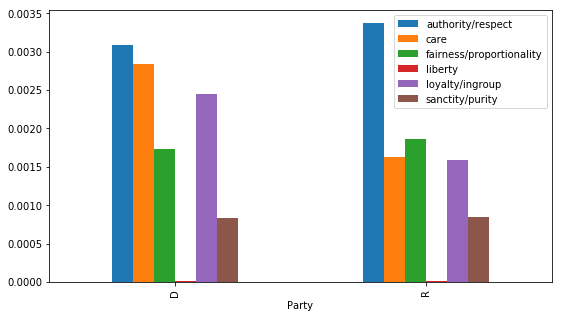

In [20]:
# Create a bar plot of foundation averages. 
# Note: the figsize argument is optional, but can make the plot bigger and easier to read
foundation_avg.plot.bar(figsize=(9,5))

Bar plots are great for this purpose because they make it very easy to compare numerical variables to one another. In this case, we can easily compare the average percentages of each foundation for each party.

But, not all bar plots are created equal. Here, it's easy to compare percentages within a party, but harder to compare percentages across parties because Democratic and Republican averages are so far apart. 

We can emphasize the differences between parties for each foundation by **transposing** `foundation_avg` (i.e. making the columns into rows and the rows into columns) and making a bar chart of that. Create a variable `party_avg` by calling `.transpose()` on `foundtion_avg`.

In [21]:
# Your code here
party_avg = foundation_avg.transpose()
party_avg

Party,D,R
authority/respect,0.003082,0.003370
care,0.002841,0.001622
fairness/proportionality,0.001734,0.001862
liberty,0.000015,0.000016
loyalty/ingroup,0.002452,0.001595
sanctity/purity,0.000836,0.000843


Now create another bar chart for `party_avg`. When would you want to use this plot instead of the first one?

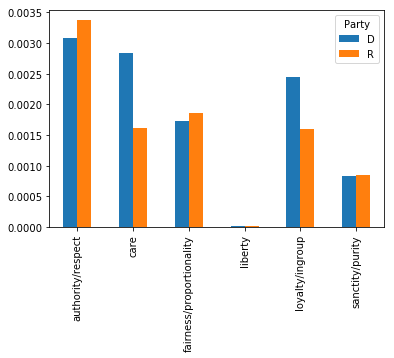

In [22]:
# Your code here
party_avg.plot.bar()

An alternative to the bar plot is the **stacked bar plot**, which stacks all of the bars for each party on top of each other. Create a stacked bar plot for `foundation_avg` below by creating a bar plot, then adding the argument `stacked=True`.

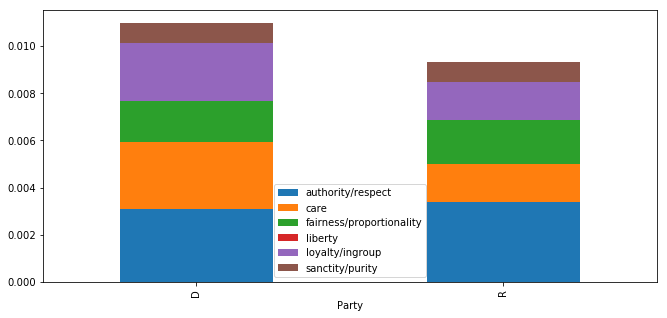

In [24]:
# Create a stacked bar plot of foundation averages. 
# Hint: this should look like the code for a bar graph, but with one extra argument for bar()
foundation_avg.plot.bar(stacked=True, figsize=(11,5))

Stacked plots combine a lot of info into fewer bars, which can be visually appealing. But, they can cause comparison errors because they **jiggle the baseline**: for every stacked bar except the base bar, the baseline begins at a different height, making it hard to compare lengths.

Here's an extreme example of jiggling (with a few other bonus graph sins: which ones can you find?):

<img src="https://i.kinja-img.com/gawker-media/image/upload/s--DstspxbR--/c_fit,fl_progressive,q_80,w_636/b5icpqdsnzsdaezvnrm1.jpg" width="500" height="500" />

Another way we might represent our percentages is with a **pie plot**, where each variable value is represented by a 'slice' of a circle. Create a pie chart using `.pie()` for the `party_avg_pie` table. Note: since there are 2 parties, pandas needs to be told to make one pie plot for each party by including the argument `subplot=True`. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D8D3724F28>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001D8D3A06978>], dtype=object)

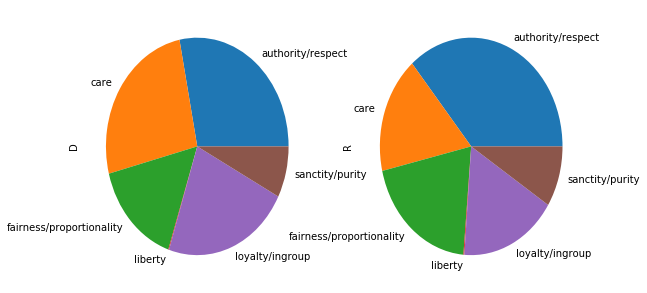

In [62]:
# Use this table to make a pie chart. 
# Values are multiplied to be larger so pandas plots it more easily (the proportions are the same)
party_avg_pie = party_avg * 1000

# Create a pie chart using .pie()
# Hint: don't forget to set subplot=True!
# Optional: set legend=False and figsize=(9,5) to get a cleaner graph
party_avg_pie.plot.pie(subplots=True, legend=False, figsize=(9,5))

Pie charts are visually appealing, but they can be problematic for readers. Consider these two bars:

<img src='len_compare.png' width=600 height=200>

It's quick and easy to see that the top one is twice as long as the bottom. (That's why we like bar plots so much)

Now, consider this image. How much smaller is the second pizza compared to the first?

<img src='area_compare.png' width=500 height=150>

The first one has about twice the area of the second, but it's much harder to form a confident and accurate judgment.

This has major implications for pie charts and other area-based visualizations. While representing numbers with area seems intuitive, adding the extra dimension makes it harder for people to form accurate comparisons.

### ii. Color <a id='subsection 7'></a>

The human visual cortex processes color preattentively; that is, people notice colors without trying to. Therefore, color can be a powerful tool to communicate information, and its use in data visualization has been the focus of many [studies](https://conference.scipy.org/scipy2014/schedule/presentation/1741/).

Pandas allows users to change their plot colors by including the `color=` argument. `color` can be set to equal a single color or a list of colors- one for each type of bar in the legend.

Try changing the colors for a bar plot of `party_avg`. You'll need a list of two colors, one for Democrats and one for Republicans in that order. Here are some of the colors pandas recognizes:

| Color   | code |
|---------|------|
| blue    | 'b'  |
| red     | 'r'  |
| green   | 'g'  |
| magenta | 'm'  |
| yellow  | 'y'  |
| cyan    | 'c'  |
| black   | 'k'  |

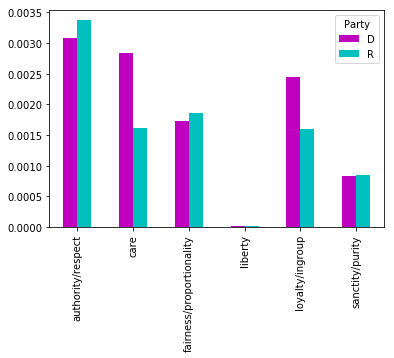

In [78]:
# Create a bar graph with non-default colors with the color= argument
party_avg.plot.bar(color=['m', 'c'])

Pandas plot functions can also take an argument called `colormap=` that colors graphs from a premade pallete. 

Try creating a bar plot for `foundation_avg` where `colormap` is set to equal `Pastel2`. You can also try out any of the other colormaps listed [here](https://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps).

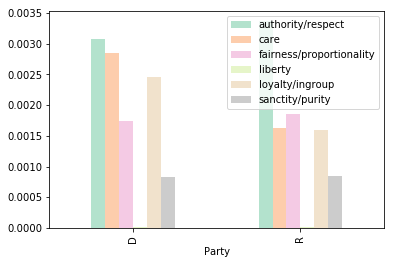

In [99]:
# Create a bar plot for foundation_avg where bar() has the argument colormap='Pastel2'
foundation_avg.plot.bar(colormap='Pastel2')

Colors help to create contrast and facilitate comparison. If colors are too similar to one another, two separate bars start to look like one individual blob and it's hard to compare the values. Set the colormap for `foundation_avg`'s bar plot equal to 'spring' to see an example.

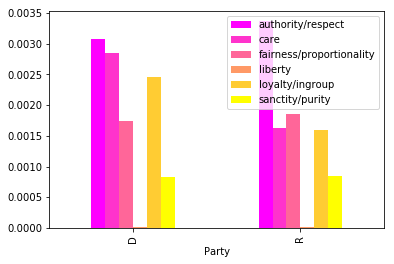

In [107]:
# Create a bar plot for foundation_avg with the 'spring' colormap
foundation_avg.plot.bar(colormap='spring')

Additionally, colors can communicate information about the importance of data. Lighter colors usually make areas look larger than darker colors. Furthermore, darker colors stand out more against the white background of most presentation platforms (paper, slideshows, Jupyter notebooks) and tend to look more prominent, weighty, and important.

Using a colormap that ranges from light to dark, then, can imply that your data varies along a scale, and the data at the dark end is more important. 

Try setting the colormap for a `foundation_avg` bar plot to `'Blues'`. How does that change our perception of the information? Is it appropriate for this graph, and if not, can you think of a graph where it would be appropriate?

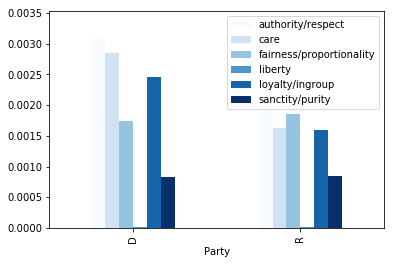

In [111]:
# Create a bar plot for foundation_avg with the 'Blues' colormap
foundation_avg.plot.bar(colormap='Blues')

Changing a plot's color palatte can also improve understanding by matching a mental model. For instance, Democrats are associated with the color blue while Republicans are associated with red. If a plot violates these associations...

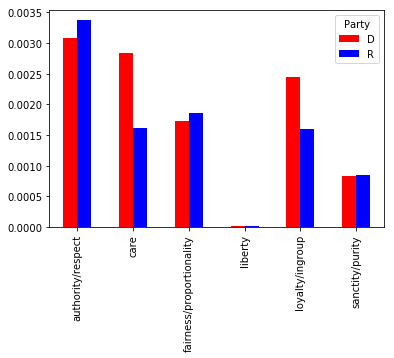

In [80]:
# Run the following cell to make a very misleading plot
party_avg.plot.bar(color=['r', 'b'])

...a reader could very easily read the results as exactly opposite what they are.

---
## 4. What's Next? <a id='section 4'></a>

* [DATA-8](http://data8.org) is offered every semester and is a great introduction to coding and statistics. The website includes links to the textbook, syllibi, and past homeworks.

And just for fun...

* [Madly Ambiguous](http://madlyambiguous.osu.edu:1035/) is an artifical intelligence that uses Wordnet to try to interpret ambiguous sentences. Includes a good explanation of how it works and where it fails.

---

## Bibliography

- Playfair, W. (1801). The Statistical Breviary: Shewing, on a Principle Entirely New, the Resources of Every State and Kingdom in Europe; Illustrated with Stained Copper-plate Charts the Physical Powers of Each Distinct Nation with Ease and Perspicuity: to which is Added, a Similar Exhibition of the Ruling Powers of Hindoostan. T. Bensley, Bolt Court, Fleet Street.

---
Notebook developed by: Keeley Takimoto, Sean Seungwoo Son, Sujude Dalieh

Data Science Modules: http://data.berkeley.edu/education/modules
